# Gradient Descent

Inspired by [Chris McCormick on Gradient Descent Derivation](http://mccormickml.com/2014/03/04/gradient-descent-derivation/)

# Background

$h(x) = \theta_0 + \theta_1X$

Find the values of $\theta_0$ and $\theta_1$ which provide the best fit of our hypothesis to a training set. 

The training set examples are labeled $x$, $y$, 

$x$ is the input value and $y$ is the output. 

The $i$th training example is labeled as $x^{(i)}$, $y^{(i)}$.

## MSE Cost Function

The cost function $J$ for a particular choice of parameters $\theta$ is the mean squared error (MSE):

$$J(\theta)=\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

$m$ The number of training examples

$x^{(i)}$ The input vector for the $i^{th}$ training example

$y^{(i)}$ The class label for the $i^{th}$ training example

$\theta$ The chosen parameter values of "weights" ($\theta_0, \theta_1, \theta_2$)

$h_{\theta}(x^{(i)})$ The algorithm's prediction for the $i^{th}$ training example using the parameters $\theta$

The MSE measures the mean amount that the model's predictions deviate from the correct values.

It is a measure of the model's performance on the training set. 

The cost is higher when the model is performing poorly on the training set. 

The objective of the learning algorithm is to find the parameters $\theta$ which give the minimum possible cost $J$.

This minimization objective is expressed using the following notation, which simply states that we want to find the $\theta$ which minimizes the cost $J(\theta)$.

$$\min_{\theta}J(\theta)$$



# Example One

# Gradient Descent Minimization

Assume the cost function is:

$$J(\theta)=\theta^2$$

And we want to find the value of $\theta$ which minimises $J(\theta)$

Assume further we starts with $\theta=3$

Gradient descent is an iterative algorithm which we will run many times. 

On each iteration, we apply the following "update rule" (the $:=$ symbol means replace $\theta$ with the value computed on the right):

$$\theta:=\theta-\alpha\frac{d}{d\theta}J(\theta)$$

Alpha is the learning rate. 

Assume $\alpha$ = 0.1 for now.

$$\frac{d}{d\theta}J(\theta)=2\theta$$





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.24.3
2.0.3
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
1.2.2


In [4]:
theta = 3
alpha = 0.1
dat = []
for oo in range(0,10):
    res = alpha * 2 * theta # update rule
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 2])
    theta = theta - res

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805


In [5]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


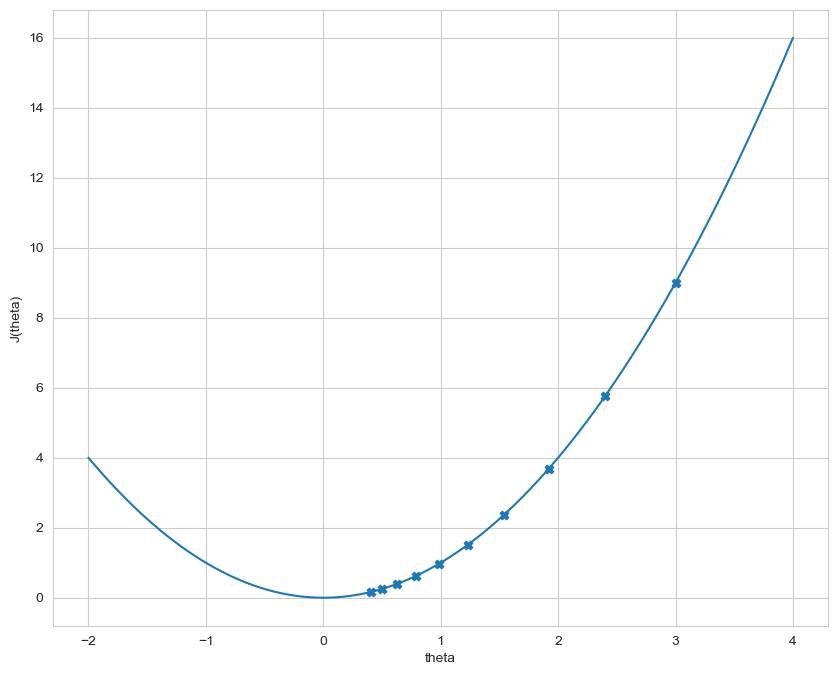

In [6]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100) ** 2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

***

# Second Example

$$J(\theta)=\theta^4 + \theta^2$$

$$\frac{d}{d\theta}J(\theta)=4\theta^3 + 2\theta$$

$$\theta:=\theta-\alpha \times (4\theta^3 + 2\theta)$$

In [7]:
theta = 3
alpha = 0.01
dat = []
for oo in range(0,10):
    res = alpha * (4 * theta ** 3 + 2 * theta) # update function
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 4 + theta ** 2])
    theta = theta - res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [8]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


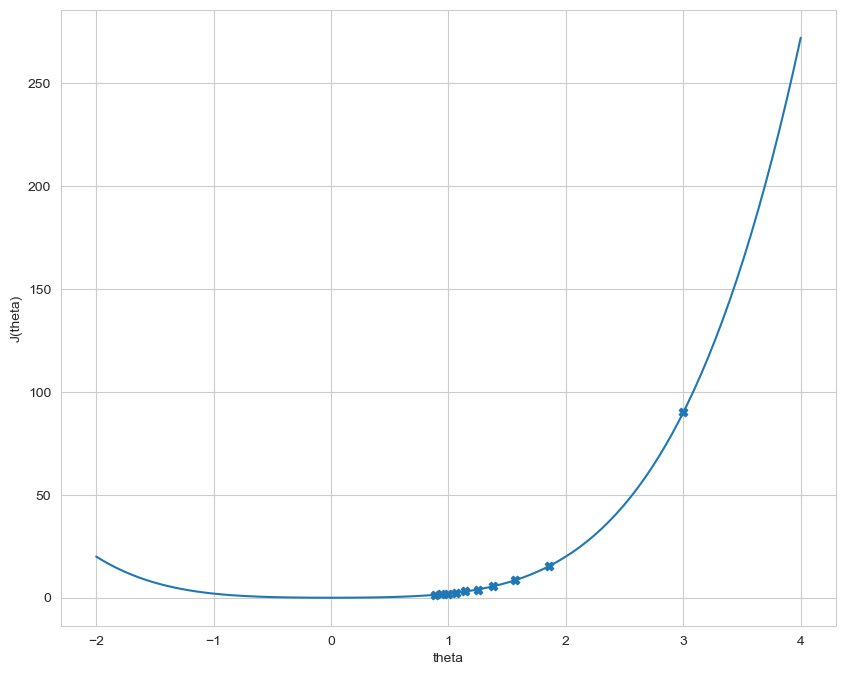

In [9]:
plt.figure(figsize=(10,8))
x_grid = np.linspace(-2, 4, 100)
plt.plot(x_grid, x_grid ** 4 + x_grid ** 2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

***

## Cost Function

$$J(\theta)=\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

## Derivative of Cost Function

$$\frac{d}{d\theta}J(\theta)=\frac{2}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)}) \times x^{(i)} $$

## Update Rule

$$\theta_i:=\theta_i-\alpha\frac{d}{d\theta}J(\theta)$$

Substitute derivative of cost function to update rule

$$\theta_i:=\theta_i-\alpha \times \frac{2}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)}) \times x^{(i)} $$

Simplifying everything, our gradient for the coefficient of x is just the average of our predicted values multiplied by their respective x value.

***

Quite often you see it in the following form:

## Cost Function

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

## Derivative of Cost Function

$$\frac{d}{d\theta}J(\theta)=\frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)}) \times x^{(i)} $$

## Update Rule

$$\theta_i:=\theta_i-\alpha\frac{d}{d\theta}J(\theta)$$

Substitute derivative of cost function to update rule

$$\theta_i:=\theta_i-\alpha \times \frac{1}{m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)}) \times x^{(i)} $$

Simplifying everything, our gradient for the coefficient of x is just the average of our predicted values multiplied by their respective x value.

***

# Applying Gradient Descent to Boston Housing Data

In [17]:
from sklearn.datasets import fetch_openml
import pandas as pd

boston_data = fetch_openml(name='boston', version=1, as_frame=True)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['target'] = boston_data.target

c:\Users\luism\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
X = df[['LSTAT']].values
y = boston_data.target

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)

# Convert 'y' Series to a numpy array and then reshape it
y_array = y.to_numpy().reshape(-1, 1)
y_std = sc_y.fit_transform(y_array).flatten()

In [28]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

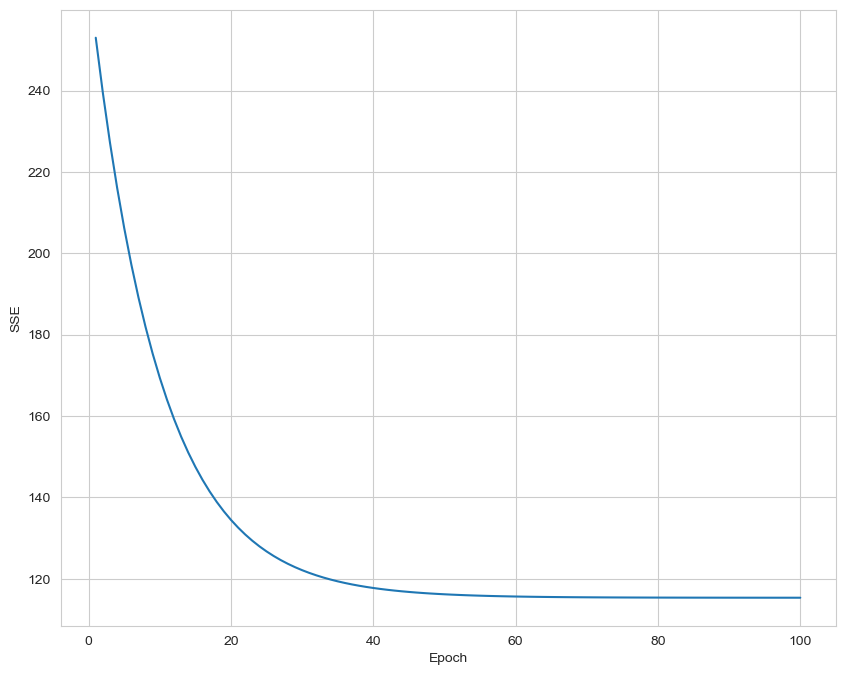

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [30]:
w_

array([-7.57793828e-16, -7.33562757e-01])

***